In [1]:
from datetime import timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Предобработка

### Загрузка файла

In [2]:
df = pd.read_csv('oc_order.csv')

/Users/andreytryastsin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (18,20,25,33,35,40,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Общая информация о полях

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16477 entries, 0 to 16476
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   order_id                   16477 non-null  int64  
 1   invoice_no                 16477 non-null  int64  
 2   invoice_prefix             16477 non-null  object 
 3   store_id                   16477 non-null  int64  
 4   store_name                 16477 non-null  object 
 5   store_url                  16477 non-null  object 
 6   customer_id                16477 non-null  int64  
 7   customer_group_id          16477 non-null  int64  
 8   firstname                  16477 non-null  object 
 9   lastname                   797 non-null    object 
 10  email                      11604 non-null  object 
 11  telephone                  16477 non-null  object 
 12  fax                        0 non-null      float64
 13  custom_field               10923 non-null  obj

### Сокращение таблицы до нужных полей

In [4]:
list_of_fields = ['customer_id', 'firstname', 'store_url',
                 'lastname', 'email', 'telephone', 
                  'total', 'date_added','shipping_city']

In [5]:
df = df[list_of_fields]

In [6]:
df

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city
0,2,Наталия,https://the-koleso.ru/,NaN,nrshop@ya.ru,+7 (921) 314-78-97,38908.0,2017-10-20 13:54:44,Санкт-Петербург
1,0,Виталий,https://the-koleso.ru/,NaN,vstolyarov@vertex.spb.ru,+7 (921) 919-26-24,60288.0,2017-10-23 17:17:31,Санкт-Петербург
2,0,Дмитрий,https://the-koleso.ru/,NaN,szht@bk.ru,+7 (962) 729-83-00,29384.0,2017-10-26 14:44:04,Санкт-Петербург
3,0,валентин,https://the-koleso.ru/,NaN,NaN,+7(961) 800-08-31,9692.0,2017-10-27 20:29:58,NaN
4,0,НИКОЛАЙ,https://the-koleso.ru/,NaN,NaN,+7(921) 093-71-76,2635.0,2017-10-28 16:48:20,NaN
...,...,...,...,...,...,...,...,...,...
16472,0,Михаил,https://moskva.the-koleso.ru/,NaN,NaN,+7(991) 136-15-21,9542.0,2022-09-14 10:59:41,NaN
16473,0,Михаил,https://moskva.the-koleso.ru/,NaN,NaN,+7(991) 136-15-21,9542.0,2022-09-14 10:59:50,NaN
16474,0,Алексей,https://the-koleso.ru/,NaN,alex7396@yandex.ru,+7 (891) 041-43-00,43375.0,2022-09-14 11:03:50,Москва
16475,0,Егор,https://moskva.the-koleso.ru/,NaN,NaN,+7(916) 980-57-73,24176.0,2022-09-14 11:34:16,NaN


### Поиск пропусков

In [7]:
df.isna().sum()

customer_id          0
firstname            0
store_url            0
lastname         15680
email             4873
telephone            0
total                0
date_added           0
shipping_city     5755
dtype: int64

Пропуски в поле Фамилия, Email, Город доставки

## Форматирование телефонных номеров

За нормальную длину примем номера 11 и 12 цифр - которые начинаются на 8 или +7.

### Подсчет длины номеров

In [8]:
df['telephone_len'] = df['telephone'].astype(str).str.len()

Какой длины номера есть в таблице:

In [9]:
df['telephone_len'].value_counts()

17    5556
11    4304
12    3444
18    2389
10     367
15     142
16     130
13      40
14      38
8       15
7       15
6        8
9        6
4        5
5        4
3        4
25       2
24       2
29       1
30       1
21       1
23       1
19       1
22       1
Name: telephone_len, dtype: int64

**Вывод:** 5556 номера длиной 17 знаков, 4304 номера длиной 11 знаков, 3444 номера длиной 12 знаков и тд.

### Просмотр номеров меньше 10 знаков

In [10]:
df[df['telephone_len'] < 10]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
1288,0,Игорь,https://lipetsk.the-koleso.ru/,NaN,kivik48@mail.ru,Курбатов,18864.0,2019-09-19 10:16:31,Липецк,8
1332,0,Владимир,https://volgograd.the-koleso.ru/,NaN,vardanyn@list.ru,Варданян,10968.0,2019-09-24 13:36:35,Волгоград,8
1344,0,Дмитрий,https://the-koleso.ru/,NaN,balticlines@mail.ru,Косов,40928.0,2019-09-25 14:35:32,Санкт-Петербург,5
1348,0,Дмитрий,https://the-koleso.ru/,NaN,chebunin.d@yandex.ru,Чебунин,33656.0,2019-09-26 09:42:46,Санкт-Петербург,7
1349,0,Дмитрий,https://the-koleso.ru/,NaN,Дмитрий Чебунин &lt;chebunin.d@yandex.ru&gt;,Чебунин,33656.0,2019-09-26 09:46:31,Санкт-Петербург,7
1647,0,Олеся,https://moskva.the-koleso.ru/,NaN,eventatrade@yandex.ru,Чачхалия,59196.0,2019-10-22 14:44:43,Москва,8
1691,0,Сергей,https://the-koleso.ru/,NaN,sss.ppp.2015@yandex.ru,Панюшкин,16216.0,2019-10-27 22:47:56,Санкт-Петербург,8
1750,0,Александр,https://the-koleso.ru/,NaN,synergonet@mail.ru,Гречаный,13248.0,2019-10-30 12:55:05,Saint-Petersburg,8
1751,0,Александр,https://the-koleso.ru/,NaN,synergonet@mail.ru,Гречаный,2660.0,2019-10-30 13:06:43,Saint-Petersburg,8
2084,0,Евгений,https://kaluga.the-koleso.ru/,NaN,e.tcedik@gmail.com,Цедик,78224.0,2019-12-13 12:19:06,Калуга,5


**Вывод:** вместо телефона либо фамилия, нерелевантные цифры, неполный номер. 

### Отбрасывание номеров меньше 10 знаков

In [11]:
df.drop(df[df['telephone_len'] < 10].index, inplace=True)

### Просмотр номеров больше 18 знаков

In [12]:
df[df['telephone_len'] > 18]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
2613,0,Вадим,https://the-koleso.ru/,NaN,harbin-lmz@rambler.ru,8 (921) 320 - 98 - 37,34656.0,2020-03-21 18:58:24,Санкт-Петербург,21
2960,0,Владимир,https://kaliningrad.the-koleso.ru/,NaN,v_kolotilin@mail.ru,+7 (79) 218-51-1313,3772.0,2020-04-16 11:30:47,Калининград,19
3608,0,Кирилл,https://petrozavodsk.the-koleso.ru/,NaN,4383586@mail.ru,89853867826.89210119811,6212.0,2020-06-24 10:46:01,Санкт-Петербург,23
8226,1296,Руслан,https://the-koleso.ru/,Слаута,slarus73@mail.ru,"89212822219, 89533040662",32122.0,2021-04-01 00:55:54,"Североморск, н.п.Североморск-3",24
8256,1296,Руслан,https://the-koleso.ru/,Слаута,slarus73@mail.ru,"89212822219, 89533040662",38349.0,2021-04-02 12:42:48,"Североморск, н.п.Североморск-3",24
12125,0,Евгений,https://the-koleso.ru/,NaN,konti178@gmail.com,"+79052056662,+79215943103",14220.8,2021-11-23 23:13:37,Санкт-Петербург,25
12609,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,-1 OR 2+733-733-1=0+0+0+1 --,68436.0,2022-01-10 16:13:04,NaN,29
12610,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,-1 OR 2+429-429-1=0+0+0+1,68436.0,2022-01-10 16:13:14,NaN,25
12611,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,-1' OR 2+163-163-1=0+0+0+1 --,68436.0,2022-01-10 16:13:30,NaN,30
15236,0,Александр,https://the-koleso.ru/,NaN,kurilovaulia88@gmail.com,+7 (993) 485-5478__-__,15640.0,2022-06-26 19:27:57,Санкт-Петербург,22


### Отбрасывание номеров больше 18 знаков

In [13]:
df.drop(df[df['telephone_len'] > 18].index, inplace=True)

In [14]:
df['telephone_len'].value_counts()

17    5556
11    4304
12    3444
18    2389
10     367
15     142
16     130
13      40
14      38
Name: telephone_len, dtype: int64

## Какие символы содержатся в поле "телефон"

In [15]:
set_of_unique_characters = set()
for telephone in df['telephone']:
    for characters in list(telephone):
        set_of_unique_characters.add(characters)

In [16]:
set_of_unique_characters

{' ',
 '(',
 ')',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 '_',
 'В',
 'З',
 'М',
 'С',
 'а',
 'в',
 'г',
 'д',
 'е',
 'и',
 'к',
 'л',
 'м',
 'н',
 'о',
 'р',
 'с',
 'т',
 'ц',
 'ч',
 'ь',
 'я'}

**Вывод:** из нерелевантных знаков можно выделить . / = _ и буквы

## Поиск букв в поле "телефон"

In [17]:
df[df['telephone'].str.contains('[А-я]', regex=True)]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
4679,0,Вадим,https://apatity.the-koleso.ru/,NaN,vsanchila@mail.ru,Вадим Санчила,13700.0,2020-09-19 02:30:53,Кировск Мурманская обл.,13
4999,0,Виталий,https://samara.the-koleso.ru/,NaN,69vk@bk.ru,г89272081590,37772.0,2020-10-08 20:54:40,Самара,12
9377,0,Предеин,https://kirov.the-koleso.ru/,NaN,maxforestmax43@gmail.ru,Максимильян,21516.0,2021-04-29 08:20:06,Киров,11
10846,0,Сергей,https://test.the-koleso.ru/,NaN,9-planeta.s@mail.ru,Заостровцев,30000.0,2021-08-18 10:47:18,NaN,11


### Удаление таких строк

In [18]:
df.drop(df[df['telephone'].str.contains('[А-я]', regex=True)].index, inplace=True)

## Просмотр других символов

### Символ "="

In [19]:
df[df['telephone'].str.contains('=')]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
6552,0,сергей,https://the-koleso.ru/,NaN,kulakovv@bk.ru,=79219796604,35280.0,2020-12-02 23:58:51,Санкт-Петербург,12


**Вывод:** = вместо +

#### Замена

In [20]:
df['telephone'] = df['telephone'].apply(lambda x: x.replace('=', '+'))

### Символ "/"

In [21]:
df[df['telephone'].str.contains('/')]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
5758,0,Алекесандр,https://the-koleso.ru/,NaN,aibush@rambler.ru,8/(921) 383-50-20,31468.0,2020-11-04 14:18:46,Санкт-Петербург,17


#### Замена

In [22]:
df['telephone'] = df['telephone'].apply(lambda x: x.replace('/', ''))

### Символ "_"

In [23]:
df[df['telephone'].str.contains('_')]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
12528,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,68436.0,2022-01-10 15:39:09,NaN,17
12529,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,68436.0,2022-01-10 15:39:21,NaN,17
12530,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,68436.0,2022-01-10 15:45:55,NaN,17
12531,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,68436.0,2022-01-10 15:46:07,NaN,17
12532,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,68436.0,2022-01-10 15:46:16,NaN,17
...,...,...,...,...,...,...,...,...,...,...
12703,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,68436.0,2022-01-10 17:04:40,NaN,17
12706,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,93765.0,2022-01-10 19:54:52,NaN,17
12707,0,wUmrLVWz,https://the-koleso.ru/,NaN,NaN,+7(___) ___-__-__,68436.0,2022-01-10 20:02:54,NaN,17
13887,0,Максим,https://kirov.the-koleso.ru/,NaN,maxik-607@mail.ru,+7 (951) 352-47-3_,10825.3,2022-04-05 20:10:14,Киров,18


In [24]:
df[df['telephone'].str.contains('_')]['telephone'].value_counts()

+7(___) ___-__-__     168
+7 (951) 352-47-3_      1
+7 (318) 024-0_-__      1
Name: telephone, dtype: int64

#### Удаление

In [25]:
df.drop(df[df['telephone'].str.contains('_')].index, inplace=True)

### Символ "."

In [26]:
df[df['telephone'].str.contains('\.')]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
16083,0,Стас,https://the-koleso.ru/,NaN,ayvozovckiy@internet.ru,+79626876027.,19256.0,2022-08-24 17:57:53,Санкт-Петербург,13


#### Удаление символа

In [27]:
df['telephone'] = df['telephone'].apply(lambda x: x.rstrip("\."))

## Удаление скобок, дефисов и пробелов в номерах

In [28]:
df['telephone'] = df['telephone'].apply(lambda x: x.replace('(',''))
df['telephone'] = df['telephone'].apply(lambda x: x.replace(')',''))
df['telephone'] = df['telephone'].apply(lambda x: x.replace('-',''))
df['telephone'] = df['telephone'].apply(lambda x: x.replace(' ',''))

## Пересчет длины номеров

In [29]:
df['telephone_len'] = df['telephone'].astype(str).str.len()

In [30]:
df['telephone_len'].value_counts()

12    11381
11     4467
10      381
13        4
14        3
Name: telephone_len, dtype: int64

**Вывод:** осталось разобрать номера длиной 10,13,14 символов

## Перепроверка символов, которые содержатся в поле "телефон"

In [31]:
set_of_unique_characters = set()
for telephone in df['telephone']:
    for characters in list(telephone):
        set_of_unique_characters.add(characters)

In [32]:
set_of_unique_characters

{'+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

**Вывод:** больше нет нерелевантных символов.

## Просмотр номеров длиной 10 символов

In [33]:
df[df['telephone_len'] == 10]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
1019,0,Светлана,https://the-koleso.ru/,NaN,vissveta@mail.ru,9602605157,3950.0,2019-06-25 22:40:25,Санкт-Петербург,10
1034,0,Юрий,https://the-koleso.ru/,NaN,belash60@yandex.ru,9219391326,21700.0,2019-07-01 21:22:21,"Санкт-Петербург, Кронштадт",10
1116,0,Руслан,https://salehard.the-koleso.ru/,NaN,grib.rus@mail.ru,9068868547,7320.0,2019-08-09 08:18:57,Лабытнанги/салехард,10
1131,0,Вячеслав,https://the-koleso.ru/,NaN,sheetkin@mail.ru,9214215585,6780.0,2019-08-12 10:11:09,Санкт-Петербург,10
1137,128,Владимир,https://pskov.the-koleso.ru/,Козлов,samogonoff@rambler.ru,9532396686,2360.0,2019-08-13 12:23:07,Псков,10
...,...,...,...,...,...,...,...,...,...,...
13574,0,Дмитрий,https://the-koleso.ru/,NaN,d_antonov@rambler.ru,9160351011,45464.0,2022-03-23 16:22:59,Москва,10
13588,0,Сан,https://the-koleso.ru/,NaN,tat56163@yandex.ru,9218971206,21748.0,2022-03-24 20:44:48,Санкт-Петербург,10
13650,0,Андрей,https://the-koleso.ru/,NaN,Kazakov9654@mail.ru,9533434935,29928.0,2022-03-28 15:52:27,Санкт-петербург,10
13660,0,Роман,https://astrahan.the-koleso.ru/,NaN,shamanaevr@mail.ru,9678274333,126500.0,2022-03-28 21:56:12,Астрахань,10


**Вывод:** номер без кода.

### Проверка - все ли такие номера начинаются на 9

In [34]:
telephones_without_code = df[df['telephone_len'] == 10]

In [35]:
telephones_without_code[~(telephones_without_code['telephone'].str.contains('^9',regex=True))]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
2070,0,Андрей,https://murmansk.the-koleso.ru/,NaN,drbalk@mail.ru,8963388005,22564.0,2019-12-10 17:54:29,Апатиты,10
3085,0,Максим,https://the-koleso.ru/,NaN,pittbull.19882@gmail.com,8921958508,23428.0,2020-04-30 14:09:56,Санкт-Петербург,10
4306,0,аророрв,https://perm.the-koleso.ru/,NaN,nbxbhhjxzhx@mail.ru,4546356464,17500.0,2020-08-20 13:48:42,Пермь,10
4948,0,Анна,https://the-koleso.ru/,NaN,anya.stp@yandex.ru,+792461712,19105.0,2020-10-06 19:57:56,Санкт-Петербург,10
6075,0,Сергей,https://the-koleso.ru/,NaN,89119042703abc@mail.ru,8911902703,32808.0,2020-11-15 12:28:21,Санкт-Петербург,10
6334,0,Виктор,https://the-koleso.ru/,NaN,belekhov1993@inbox.ru,8911141519,21100.0,2020-11-23 00:48:41,Санкт-Петербург,10
6404,0,Рустам,https://the-koleso.ru/,NaN,emts@list.ru,3532551198,15088.0,2020-11-25 14:28:16,Оренбург,10
9371,0,Виктор,https://orel.the-koleso.ru/,NaN,kuznec290160@yandex.ru,8928180784,6412.0,2021-04-28 22:36:30,г.Мценск,10
11578,0,Иван,https://the-koleso.ru/,NaN,belov@ipoteka-lo.ru,8952225500,5413.0,2021-10-14 13:22:45,Санкт-Петербург,10
11680,0,Александр,https://bryansk.the-koleso.ru/,NaN,tektest32@bk.ru,7907352057,18660.0,2021-10-22 12:09:20,Брянск,10


**Вывод:** есть номера из 10 символов, которые не начинаются на 9, а просто являются неполным некорректным номером.

#### Удаление

In [36]:
df.drop(telephones_without_code[~(telephones_without_code['telephone']
                                  .str.contains('^9',regex=True))].index, inplace=True)

### Замена номеров без кода на номера с +7

In [37]:
df.loc[df['telephone_len'] == 10, 'telephone'] = df['telephone'].apply(lambda x: '+7'+x)

## Просмотр номеров длиной 13 и 14 символов

In [38]:
df[df['telephone_len'] > 12]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
2379,0,Е,https://the-koleso.ru/,NaN,pos@tinkoff.ru,+7999999999999,5537.0,2020-02-26 15:23:24,Москва,14
4769,0,поа раорп орор,https://the-koleso.ru/,NaN,aadjbk@jbfka.ru,34567890876765,4695.0,2020-09-27 19:12:29,Санкт-Петербург,14
4770,0,ууу,https://the-koleso.ru/,NaN,123@gmail.com,+711111111111,5145.0,2020-09-27 19:28:55,Пермь,13
5971,0,Валерия,https://the-koleso.ru/,NaN,v.kiliminskaya@cleverbros.ru,+792176902649,19928.0,2020-11-11 16:36:34,Санкт-Петербург,13
6188,0,Егор,https://veliky-novgorod.the-koleso.ru/,NaN,dgordgik@list.ru,8953903190272,6840.0,2020-11-18 18:04:47,Великий Новгород,13
9699,0,Аxxfffff,https://the-koleso.ru/,NaN,s@xxx.ry,9555555555555,3014.0,2021-05-12 15:27:18,Санкт-Петербург,13
12179,0,Максим,https://nizhniy-novgorod.the-koleso.ru/,NaN,m2009-k@mail.ru,+7908157111575,20464.0,2021-11-28 15:07:48,Нижегородская область,14


#### Удаление

In [39]:
df.drop(df[df['telephone_len'] > 12].index, inplace=True)

## Замена номеров, которые начинаются на 8 на +7

In [40]:
df.loc[df['telephone'].str.startswith('8'), 'telephone'] = df['telephone'].str.replace('^8', '+7',regex=True)

## Поиск номеров, которые начинаюися на 7

In [41]:
df[df['telephone'].str.contains('^7', regex=True)]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
1032,107,Вячеслав,https://the-koleso.ru/,Назаренко,slava.920@mail.ru,79219208970,1230.0,2019-06-30 22:26:58,Санкт-Петербург,11
1147,0,Александр,https://the-koleso.ru/,NaN,2234033@mail.ru,79215589088,1230.0,2019-08-16 20:29:51,Санкт-Петербург,11
1160,0,Павел,https://the-koleso.ru/,NaN,paveltomilin@mail.ru,79601121120,7035.0,2019-08-21 19:39:44,Санкт-Петербург,11
1197,0,Аоександр,https://the-koleso.ru/,NaN,alexandr.pavlenko96@gmail.com,793196390946,4560.0,2019-09-04 06:22:16,Санкт Петербург,12
1378,0,Фёдор,https://the-koleso.ru/,NaN,mohov_f@mail.ru,79218718930,9100.0,2019-09-29 07:59:27,Санкт-Петербург,11
...,...,...,...,...,...,...,...,...,...,...
13039,0,Александр,https://the-koleso.ru/,NaN,absteb66@mail.ru,79119295537,46096.0,2022-02-28 13:38:39,Санкт-Петербург,11
13092,0,Денис,https://the-koleso.ru/,NaN,kod3336688@yandex.ru,79315991941,18880.0,2022-03-01 21:47:18,Санкт-Петербург,11
13159,0,Алексей,https://the-koleso.ru/,NaN,axcx17@gmail.com,79219433563,28901.0,2022-03-04 10:39:04,Санкт-Петербург,11
13160,0,Алексей,https://the-koleso.ru/,NaN,axcx17@gmail.com,79219433563,30281.0,2022-03-04 10:46:01,Санкт-Петербург,11


### Замена 7 на +7

In [42]:
df.loc[df['telephone'].str.contains('^7', regex=True), 'telephone'] = df['telephone'].apply(lambda x: '+'+x)

## Поиск номеров, которые начинаются не на +7

In [43]:
df[~(df['telephone'].str.startswith('+7'))]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
988,0,Oleg,https://the-koleso.ru/,NaN,info@mrnr.ru,999999999999,5225.0,2019-06-05 10:44:34,NaN,12
1720,0,Эдуард,https://the-koleso.ru/,NaN,eduard@zaosmm.ru,99119429641,63040.0,2019-10-29 12:14:31,Санкт-Петербург,11
2782,0,Елена,https://rostov-na-donu.the-koleso.ru/,NaN,kybik-89@mail.ru,+89281618353,3909.0,2020-04-06 11:50:57,Ростов-на-Дону,12
2846,0,Борис,https://the-koleso.ru/,NaN,boris.speransky@yandex.ru,079110872727,9061.0,2020-04-09 15:26:37,Зеленогорск,12
4773,0,алексей,https://moskva.the-koleso.ru/,NaN,gan_1968@mail.ru,+89266023468,11280.0,2020-09-27 20:21:45,"Сергиево-Посадский р-н, Сергиев Посад",12
4787,0,Алексей,https://the-koleso.ru/,NaN,a.levush@mail.ru,+9216464602,11840.0,2020-09-28 12:54:05,Санкт-Петербург,11
6301,0,Эдуард,https://the-koleso.ru/,NaN,gudik13@rambler/ru,+9992131086,11080.0,2020-11-22 11:44:27,Санкт-Петербург,11
6369,0,Степан,https://the-koleso.ru/,NaN,varliginstepan@yandex.ru,+89043338775,8700.0,2020-11-23 21:26:59,Санкт-Петербург,12
8139,0,Василий,https://the-koleso.ru/,NaN,rvfi@yandex.ru,+9213435470,42220.0,2021-03-29 14:17:24,Санкт-Петербург,11
8156,0,Николай,https://ryazan.the-koleso.ru/,NaN,nikola87-08@bk.ru,+89228438889,4426.0,2021-03-29 23:02:53,Оренбург,12


**Вывод:** некоторые номера начинаются на +8, в некоторых пропущена 7, поэтому получилось +9 из 11 символов, некоторые номера некорректные.

### Замена +8 на +7

In [44]:
df['telephone'] = df['telephone'].apply(lambda x: x.replace('+8','+7'))

### Замена +9 на +79

In [45]:
df['telephone'] = df['telephone'].apply(lambda x: x.replace('+9','+79'))

#### Удаление оставшихся номеров, которые не начинаются на +7

In [46]:
df.drop(df[~(df['telephone'].str.startswith('+7'))].index, inplace=True)

## Пересчет длины номеров

In [47]:
df['telephone_len'] = df['telephone'].astype(str).str.len()

In [48]:
df['telephone_len'].value_counts()

12    16194
13       11
11        7
Name: telephone_len, dtype: int64

In [49]:
df[df['telephone_len'] == 13]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
1197,0,Аоександр,https://the-koleso.ru/,NaN,alexandr.pavlenko96@gmail.com,+793196390946,4560.0,2019-09-04 06:22:16,Санкт Петербург,13
2652,0,Павел,https://the-koleso.ru/,NaN,glushkov_86@bk.ru,+799062617711,8750.0,2020-03-25 09:58:37,Санкт-Петербург,13
2881,0,Дарья,https://the-koleso.ru/,NaN,putilovad@yandex.ru,+796753231282,3300.0,2020-04-11 14:46:25,Санкт-Петербург,13
3413,0,Елена,https://the-koleso.ru/,NaN,awrill@yandex.ru,+790500394745,450.0,2020-06-02 14:45:09,Санкт-Петербург,13
3483,0,Николай,https://the-koleso.ru/,NaN,nikolayverbickiy@rambler.ru,+792111812608,5265.0,2020-06-08 20:15:00,Санкт-Петербург,13
3997,0,Ирина,https://the-koleso.ru/,NaN,i.kirbay@7774848.ru,+791160202090,11540.0,2020-07-24 17:36:38,Санкт-Петербург,13
6728,0,Olga,https://the-koleso.ru/,NaN,oospb@icloud.com,+792194150975,8680.0,2020-12-15 12:03:32,Санкт-Петербург,13
9175,0,Никита,https://lipetsk.the-koleso.ru/,NaN,nike129548@rambler.ru,+790158584549,20144.0,2021-04-22 18:43:41,Лебедянь,13
10150,0,Кирилл,https://test.the-koleso.ru/,NaN,k.kadukoff@yandex.ru,+798811068687,7139.0,2021-06-24 18:36:21,Санкт-Петербург,13
10430,0,максим,https://test.the-koleso.ru/,NaN,m9220850@yandex.ru,+791192208850,9438.0,2021-07-21 15:32:35,Санкт-Петербург,13


In [50]:
df.drop(df[(df['telephone_len'] == 11) | (df['telephone_len'] == 13)].index, inplace=True)

In [51]:
df['telephone_len'] = df['telephone'].astype(str).str.len()

In [52]:
df['telephone_len'].value_counts()

12    16194
Name: telephone_len, dtype: int64

In [53]:
df

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
0,2,Наталия,https://the-koleso.ru/,NaN,nrshop@ya.ru,+79213147897,38908.0,2017-10-20 13:54:44,Санкт-Петербург,12
1,0,Виталий,https://the-koleso.ru/,NaN,vstolyarov@vertex.spb.ru,+79219192624,60288.0,2017-10-23 17:17:31,Санкт-Петербург,12
2,0,Дмитрий,https://the-koleso.ru/,NaN,szht@bk.ru,+79627298300,29384.0,2017-10-26 14:44:04,Санкт-Петербург,12
3,0,валентин,https://the-koleso.ru/,NaN,NaN,+79618000831,9692.0,2017-10-27 20:29:58,NaN,12
4,0,НИКОЛАЙ,https://the-koleso.ru/,NaN,NaN,+79210937176,2635.0,2017-10-28 16:48:20,NaN,12
...,...,...,...,...,...,...,...,...,...,...
16472,0,Михаил,https://moskva.the-koleso.ru/,NaN,NaN,+79911361521,9542.0,2022-09-14 10:59:41,NaN,12
16473,0,Михаил,https://moskva.the-koleso.ru/,NaN,NaN,+79911361521,9542.0,2022-09-14 10:59:50,NaN,12
16474,0,Алексей,https://the-koleso.ru/,NaN,alex7396@yandex.ru,+78910414300,43375.0,2022-09-14 11:03:50,Москва,12
16475,0,Егор,https://moskva.the-koleso.ru/,NaN,NaN,+79169805773,24176.0,2022-09-14 11:34:16,NaN,12


## Поиск номеров которые не начинаются на +79

In [54]:
df[~(df['telephone'].str.startswith('+79'))]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
19,0,Aleksey,https://the-koleso.ru/,NaN,8410802@gmail.com,+78911841080,7423.56,2017-11-24 17:10:43,Санкт-Петербург,12
131,0,юлоо,https://the-koleso.ru/,NaN,4545@ff.rt,+71111111111,1433.10,2018-04-05 18:43:10,Санкт-Петербург,12
158,0,Анатолий,https://the-koleso.ru/,NaN,NaN,+70650661639,4241.00,2018-04-10 16:00:48,NaN,12
381,0,Тест,https://the-koleso.ru/,NaN,project@mrnr.ru,+77928802778,860.00,2018-07-11 09:57:59,Санкт-Петербург,12
382,0,Ddd,https://the-koleso.ru/,NaN,NaN,+77777777777,410.00,2018-07-11 09:59:05,NaN,12
...,...,...,...,...,...,...,...,...,...,...
16221,0,John Doe,https://the-koleso.ru/,NaN,info@mrnr.ru,+78999999999,5371.00,2022-09-01 17:36:57,NaN,12
16222,0,John Doe,https://the-koleso.ru/,NaN,info@mrnr.ru,+78999999999,5371.00,2022-09-01 17:37:06,NaN,12
16270,0,Игорь Алексеевич Стефаненко,https://moskva.the-koleso.ru/,NaN,NaN,+78964559161,8281.00,2022-09-05 11:04:08,NaN,12
16329,0,михаил,https://murmansk.the-koleso.ru/,NaN,m.gromoff51@ya.ru,+78921158386,58636.00,2022-09-07 15:40:41,NaN,12


#### Удаление

In [55]:
df.drop(df[~(df['telephone'].str.startswith('+79'))].index, inplace=True)

## Поиск нерелевантных значений в поле "firstname" и "email"

В процессе просмотра таблицы были замечены тестовые заказы.

### Проверка по имени

In [56]:
test_orders = 'тест|Тест|ТЕСТ|Руки|Крюки|KOTENKOV|Test|TEST|test|John|mrnr|marronnier'

In [57]:
df[df['firstname'].str.contains(test_orders,regex=True)]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
299,0,John,https://the-koleso.ru/,NaN,info@mrnr.ru,+79999999999,14622.0,2018-05-24 16:01:56,test,12
383,0,Тест,https://the-koleso.ru/,NaN,NaN,+79218802778,410.0,2018-07-11 10:00:31,NaN,12
673,0,John Doe,https://the-koleso.ru/,NaN,info@mrnr.ru,+79999999999,9655.0,2018-12-10 09:37:14,Санкт-Петербург,12
691,0,test,https://the-koleso.ru/,NaN,a@mail.ru,+79999999999,8923.0,2018-12-22 14:56:21,Новосибирск,12
692,0,test,https://the-koleso.ru/,NaN,a@mail.ru,+79999999999,6163.0,2018-12-22 15:02:08,Новосибирск,12
...,...,...,...,...,...,...,...,...,...,...
12709,0,test,https://the-koleso.ru/,NaN,9213698333@mail.ru,+79213698333,24264.0,2022-01-11 09:34:06,Санкт-Петербург,12
15467,0,тест,https://the-koleso.ru/,NaN,megafon1992@mail.ru,+79045565923,2350.0,2022-07-13 12:32:07,Санкт-Петербург,12
16185,0,тест,https://the-koleso.ru/,NaN,test@mail.ru,+79999999999,18988.0,2022-08-30 18:34:23,Москва,12
16220,0,John,https://the-koleso.ru/,NaN,info@mrnr.ru,+79999999999,5446.0,2022-09-01 16:26:19,NaN,12


#### Удаление

In [58]:
df.shape

(15897, 10)

In [59]:
df.drop(df[df['firstname'].str.contains(test_orders,regex=True)].index, inplace=True)

In [60]:
df.shape

(15819, 10)

### Проверка по email

In [61]:
df['email'] = df['email'].fillna('-')

In [62]:
test_orders = 'tirealliance|test|TEST|Test|John|mrnr|marronnier'

In [63]:
df[df['email'].str.contains(test_orders,regex=True)]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
710,0,tes,https://the-koleso.ru/,NaN,test1.\email@mail.ru,+79896656515,8311.0,2018-12-26 06:25:00,Новосибирск,12
735,0,tes,https://the-koleso.ru/,NaN,test1.\email@mail.ru,+79896656515,13549.0,2018-12-26 20:08:20,Новосибирск,12
981,0,чсмчсмч,https://the-koleso.ru/,Kotenkov,tirealliance@gmail.com,+79112407505,975.0,2019-05-31 14:29:10,Санкт-Петребург,12
2366,0,Oleg,https://the-koleso.ru/,NaN,info@mrnr.ru,+79999999999,7050.0,2020-02-25 15:48:43,Saint-Petersburg,12
2451,0,t,https://the-koleso.ru/,NaN,project@mrnr.ru,+79218802778,4351.0,2020-03-06 09:04:35,Санкт-Петербург,12
14249,0,Михаил,https://the-koleso.ru/,NaN,vibtest@mail.ru,+79219695338,39852.0,2022-04-18 14:01:13,Санкт-Петербург,12


#### Удаление

In [64]:
df.shape

(15819, 10)

In [65]:
df.drop(df[df['email'].str.contains(test_orders,regex=True)].index, inplace=True)

In [66]:
df.shape

(15813, 10)

## Вывод
<br>
<div style="border:solid blue 3px; padding: 20px">
Все номера приведены к общему виду - начинаются на +7, длина равна 12 символам. Удалены тестовые заказы. В результате обработки отсеялось 664 строки - 4% от изначального объема данных.
    </div>

## Форматирование поля с датой покупки

### Просмотр дубликатов

#### Телефон и дата покупки

In [67]:
df[df.duplicated(subset=['telephone','date_added'], keep=False)]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
324,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:14,NaN,12
325,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:14,NaN,12
326,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:14,NaN,12
327,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:14,NaN,12
328,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:15,NaN,12
329,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:15,NaN,12
330,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:16,NaN,12
331,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:16,NaN,12
332,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:16,NaN,12
333,0,Мих,https://the-koleso.ru/,NaN,-,+79112012001,24384.0,2018-06-28 19:53:16,NaN,12


In [68]:
len(df[df.duplicated(subset=['telephone','date_added'], keep=False)])

30

**Вывод:** 30 строк, которые распознаются как дубликат.

### Удаление дубликатов

Изначальный размер данных - 15844 записи

In [69]:
df.shape

(15813, 10)

Размер после удаления:

In [70]:
df.drop_duplicates(subset=['telephone','date_added'], inplace=True)

In [71]:
df.shape

(15791, 10)

#### Телефон и сумма покупки

По каким-то причинам покупатели могут оставлять заказы на одну и ту же сумму, но в разное время, такие результаты могут повлиять на RFM, конкретно на recency.

In [72]:
df[df.duplicated(subset=['telephone','total'], keep=False)]

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len
11,0,Юрий,https://the-koleso.ru/,NaN,Anyutochka.91@mail.ru,+79215646303,3874.0,2017-11-09 14:45:39,Санкт-Петербург,12
12,0,Юрий,https://the-koleso.ru/,NaN,Anyutochka.91@mail.ru,+79215646303,3874.0,2017-11-10 23:18:32,Санкт-Петербург,12
25,0,Виктор,https://the-koleso.ru/,NaN,info@svitspb.ru,+79817009866,13500.0,2017-12-06 15:49:41,NaN,12
26,0,Виктор,https://the-koleso.ru/,NaN,info@svitsbp.ru,+79817009866,13500.0,2017-12-06 15:51:56,Санкт-Петербург,12
49,0,Десятниченко Ирина Игоревна,https://the-koleso.ru/,NaN,Rina-best@yandex.ru,+79129576937,38004.0,2018-02-14 00:03:02,Усинск,12
...,...,...,...,...,...,...,...,...,...,...
16444,0,Иван,https://the-koleso.ru/,NaN,ivandraga09@gmail.com,+79111547264,29476.0,2022-09-12 15:09:47,Санкт-Петербург,12
16469,0,Алл,https://ekaterinburg.the-koleso.ru/,NaN,2017013@e`.ru,+79638501389,24420.0,2022-09-14 08:02:53,Екатеринбург,12
16470,2168,Алл,https://ekaterinburg.the-koleso.ru/,Неизвестный,2017013@e1.ru,+79638501389,24420.0,2022-09-14 08:06:02,Екатеринбург,12
16472,0,Михаил,https://moskva.the-koleso.ru/,NaN,-,+79911361521,9542.0,2022-09-14 10:59:41,NaN,12


In [73]:
len(df[df.duplicated(subset=['telephone','total'], keep=False)])

3476

**Вывод:** 3476 строк, которые распознаются как дубликат.

### Удаление дубликатов

Изначальный размер данных - 15844 записи

In [74]:
df.shape

(15791, 10)

Размер после удаления:

In [75]:
df.drop_duplicates(subset=['telephone','total'], inplace=True)

In [76]:
df.shape

(13724, 10)

### Вывод
<br>
<div style="border:solid blue 3px; padding: 20px">
Удалено 2089 дублей - 12,6% от изначального набора данных.
    </div>

### Приведение дат в формат даты

In [77]:
df['date'] = pd.to_datetime(df['date_added'], format='%Y.%m.%d')#.dt.date

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13724 entries, 0 to 16476
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    13724 non-null  int64         
 1   firstname      13724 non-null  object        
 2   store_url      13724 non-null  object        
 3   lastname       653 non-null    object        
 4   email          13724 non-null  object        
 5   telephone      13724 non-null  object        
 6   total          13724 non-null  float64       
 7   date_added     13724 non-null  object        
 8   shipping_city  9871 non-null   object        
 9   telephone_len  13724 non-null  int64         
 10  date           13724 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.3+ MB


### Приведение суммы покупке к целым числам

In [79]:
df['total'] = df['total'].astype(int)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13724 entries, 0 to 16476
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    13724 non-null  int64         
 1   firstname      13724 non-null  object        
 2   store_url      13724 non-null  object        
 3   lastname       653 non-null    object        
 4   email          13724 non-null  object        
 5   telephone      13724 non-null  object        
 6   total          13724 non-null  int64         
 7   date_added     13724 non-null  object        
 8   shipping_city  9871 non-null   object        
 9   telephone_len  13724 non-null  int64         
 10  date           13724 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 1.3+ MB


In [81]:
df.head()

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len,date
0,2,Наталия,https://the-koleso.ru/,NaN,nrshop@ya.ru,+79213147897,38908,2017-10-20 13:54:44,Санкт-Петербург,12,2017-10-20 13:54:44
1,0,Виталий,https://the-koleso.ru/,NaN,vstolyarov@vertex.spb.ru,+79219192624,60288,2017-10-23 17:17:31,Санкт-Петербург,12,2017-10-23 17:17:31
2,0,Дмитрий,https://the-koleso.ru/,NaN,szht@bk.ru,+79627298300,29384,2017-10-26 14:44:04,Санкт-Петербург,12,2017-10-26 14:44:04
3,0,валентин,https://the-koleso.ru/,NaN,-,+79618000831,9692,2017-10-27 20:29:58,NaN,12,2017-10-27 20:29:58
4,0,НИКОЛАЙ,https://the-koleso.ru/,NaN,-,+79210937176,2635,2017-10-28 16:48:20,NaN,12,2017-10-28 16:48:20


# Создание RFM-модели

## Вычисление параметров

### Recency - как давно покупал клиент (сколько дней назад)

Существующий временной интервал:

In [82]:
df['date'].describe()

/Users/andreytryastsin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   13724
unique                  13723
top       2022-08-06 18:04:19
freq                        2
first     2017-10-20 13:54:44
last      2022-09-14 11:48:51
Name: date, dtype: object

Начало - 2017-10-20<br>
Конец - 2022-09-14

Сколько в нем дней:

In [83]:
period = pd.Interval(pd.Timestamp('2017-10-20 00:00:00'), pd.Timestamp('2022-09-14 00:00:00')).length

In [84]:
period

Timedelta('1790 days 00:00:00')

In [85]:
period = 1790

Определение даты, от которой будет вестись отчет:

In [86]:
top_date = df['date'].max() + timedelta(days=1)

In [87]:
top_date

Timestamp('2022-09-15 11:48:51')

Последний заказ в таблице 14 сентября, отчет будет вестись от 15 сентября, от этой даты считается сколько дней назад покупал клиент.

Создание нового столбца с данными о разнице количества дней между датой отсчета 15.09.2022 и датой покупки - как давно была покупка относительно даты отсчета:

In [88]:
df['days_since_prev_order'] = df['date'].apply(lambda x: (top_date - x).days)

Определение минимальной давности от последней даты для каждого пользователя:

In [89]:
df['recency'] = df['telephone'].apply(lambda x: df[df['telephone'] == x]['days_since_prev_order'].min())

In [90]:
df.head()

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len,date,days_since_prev_order,recency
0,2,Наталия,https://the-koleso.ru/,NaN,nrshop@ya.ru,+79213147897,38908,2017-10-20 13:54:44,Санкт-Петербург,12,2017-10-20 13:54:44,1790,1790
1,0,Виталий,https://the-koleso.ru/,NaN,vstolyarov@vertex.spb.ru,+79219192624,60288,2017-10-23 17:17:31,Санкт-Петербург,12,2017-10-23 17:17:31,1787,1787
2,0,Дмитрий,https://the-koleso.ru/,NaN,szht@bk.ru,+79627298300,29384,2017-10-26 14:44:04,Санкт-Петербург,12,2017-10-26 14:44:04,1784,1784
3,0,валентин,https://the-koleso.ru/,NaN,-,+79618000831,9692,2017-10-27 20:29:58,NaN,12,2017-10-27 20:29:58,1783,1783
4,0,НИКОЛАЙ,https://the-koleso.ru/,NaN,-,+79210937176,2635,2017-10-28 16:48:20,NaN,12,2017-10-28 16:48:20,1782,1782


### Frequency - как часто покупал клиент

Расчет количества заказов каждого пользователя за весь период (1790 дней):

In [91]:
aggr = {'date': lambda x: len([d for d in x if d >= top_date - timedelta(days=period)])}

In [92]:
frequency = df.groupby('telephone').agg(aggr).reset_index()

Добавление данных из группировки в основную таблицу:

In [93]:
df = pd.merge(df, frequency, on='telephone', how='inner')

In [94]:
df.rename(columns={"date_y": "frequency"}, inplace=True)

### Monetary - сколько клиент потратил

Сколько каждый пользователь потратил за все время жизни:

In [95]:
df['monetary'] = df['telephone'].apply(lambda x: df[(df['telephone'] == x) & \
                                                  (df['date_x'] >= top_date - timedelta(days=period))]\
                                                  ['total'].sum())

## Создание модели

### Разделение всех параметров на квантили размером 20%-40%-60%-80%

In [96]:
quintiles = df[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()

In [97]:
quintiles

{'recency': {0.2: 190.0, 0.4: 482.0, 0.6: 638.0, 0.8: 830.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'monetary': {0.2: 8323.6,
  0.4: 15727.200000000012,
  0.6: 24560.0,
  0.8: 41132.0}}

#### Это означает
<br>
Recency:<br>
- 20% клиентов в первом квантиле имеют верхнюю границу давности 189 дней, в этом отрезке клиенты, которые покупали недавно по сравнению с остальными - получают балл R5 , <br>
- 20% клиентов во втором отрезке - давность от 190 до 474 дней - R4, <br>
- 20% клиентов в третьем отрезке - от 475 до 639 дней - R3, <br>
- 20% клиентов в четвертом отрезке - от 640 до 831 дней - R2, <br>
- 20% клиентов в пятом отрезке - от 832 дней и больше - R1.
<br>
<br>
Frequency:<br>
- 80% клиентов с первого по четверный отрезки - покупали 1 раз - F1,<br>
- 20% в четвертом отрезке -  2 раза - F4,<br>
- 20% в пятом отрезке - больше 2 раз - F5.
<br>
<br>
Monetary:<br> 
- 20% клиентов в первом отрезке - верхняя граница трат 9780руб. - M1, <br> 
- 20% клиентов во втором отрезке - 18294 - M2, <br> 
- 20% клиентов в третьем отрезке - 29503 - M3, <br> 
- 20% клиентов в четвертом отрезке - 54400 - M4, <br> 
- 20% клиентов в пятом отрезке - более 54400  - M5.

Функции для расчета значений rfm для каждого пользователя:

In [98]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def f_score(x):
    if x <= quintiles['frequency'][.6]:
        return 1
    elif x <= quintiles['frequency'][.8]:
        return 4
    else:
        return 5
    
def m_score(x):
    if x <= quintiles['monetary'][.2]:
        return 1
    elif x <= quintiles['monetary'][.4]:
        return 2
    elif x <= quintiles['monetary'][.6]:
        return 3
    elif x <= quintiles['monetary'][.8]:
        return 4
    else:
        return 5 

Расчет баллов RFM для каждого пользователя:

In [99]:
df['R'] = df['recency'].apply(lambda x: r_score(x))
df['F'] = df['frequency'].apply(lambda x: f_score(x))
df['M'] = df['monetary'].apply(lambda x: m_score(x))

In [100]:
df.head()

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len,date_x,days_since_prev_order,recency,frequency,monetary,R,F,M
0,2,Наталия,https://the-koleso.ru/,NaN,nrshop@ya.ru,+79213147897,38908,2017-10-20 13:54:44,Санкт-Петербург,12,2017-10-20 13:54:44,1790,1790,0,0,1,1,1
1,0,Виталий,https://the-koleso.ru/,NaN,vstolyarov@vertex.spb.ru,+79219192624,60288,2017-10-23 17:17:31,Санкт-Петербург,12,2017-10-23 17:17:31,1787,1787,1,60288,1,1,5
2,0,Дмитрий,https://the-koleso.ru/,NaN,szht@bk.ru,+79627298300,29384,2017-10-26 14:44:04,Санкт-Петербург,12,2017-10-26 14:44:04,1784,1784,1,29384,1,1,4
3,0,валентин,https://the-koleso.ru/,NaN,-,+79618000831,9692,2017-10-27 20:29:58,NaN,12,2017-10-27 20:29:58,1783,1783,1,9692,1,1,2
4,0,НИКОЛАЙ,https://the-koleso.ru/,NaN,-,+79210937176,2635,2017-10-28 16:48:20,NaN,12,2017-10-28 16:48:20,1782,1782,1,2635,1,1,1


Объединение баллов одну ячейку:

In [101]:
df['RFM_Score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)

In [102]:
df.head()

,customer_id,firstname,store_url,lastname,email,telephone,total,date_added,shipping_city,telephone_len,date_x,days_since_prev_order,recency,frequency,monetary,R,F,M,RFM_Score
0,2,Наталия,https://the-koleso.ru/,NaN,nrshop@ya.ru,+79213147897,38908,2017-10-20 13:54:44,Санкт-Петербург,12,2017-10-20 13:54:44,1790,1790,0,0,1,1,1,111
1,0,Виталий,https://the-koleso.ru/,NaN,vstolyarov@vertex.spb.ru,+79219192624,60288,2017-10-23 17:17:31,Санкт-Петербург,12,2017-10-23 17:17:31,1787,1787,1,60288,1,1,5,115
2,0,Дмитрий,https://the-koleso.ru/,NaN,szht@bk.ru,+79627298300,29384,2017-10-26 14:44:04,Санкт-Петербург,12,2017-10-26 14:44:04,1784,1784,1,29384,1,1,4,114
3,0,валентин,https://the-koleso.ru/,NaN,-,+79618000831,9692,2017-10-27 20:29:58,NaN,12,2017-10-27 20:29:58,1783,1783,1,9692,1,1,2,112
4,0,НИКОЛАЙ,https://the-koleso.ru/,NaN,-,+79210937176,2635,2017-10-28 16:48:20,NaN,12,2017-10-28 16:48:20,1782,1782,1,2635,1,1,1,111


Сколько сегментов получено:

In [103]:
df['RFM_Score'].value_counts()

111    722
211    615
514    588
515    544
112    543
      ... 
453      3
152      3
553      3
253      3
153      3
Name: RFM_Score, Length: 67, dtype: int64

Получено 74 комбинации.

### Создание названий для полученных сегментов

In [104]:
quintiles

{'recency': {0.2: 190.0, 0.4: 482.0, 0.6: 638.0, 0.8: 830.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'monetary': {0.2: 8323.6,
  0.4: 15727.200000000012,
  0.6: 24560.0,
  0.8: 41132.0}}

In [105]:
segt_map = {
    r'[4-5][4-5][4-5]': 'ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ ВЫСОКИЙ ЧЕК - покупает часто - более от 2х раз, покупал недавно - до 483 дней назад',
    r'[4-5][4-5][1-3]': 'ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ НИЗКИЙ ЧЕК - покупает часто - более от 2х раз, покупал недавно - до 483 дней назад',

    r'3[4-5][1-2]': 'ОБРАТИТЬ ВНИМАНИЕ - последний раз покупали давно - более 483 дней назад, но раньше покупал часто - от 2х раз',
    r'3[4-5][3-5]': 'В ЗОНЕ РИСКА НЕЛЬЗЯ ПОТЕРЯТЬ - последний раз покупали давно - более 483 дней назад, но довольно часто - от 2х раз и на средние-крупные суммы',

    r'[1-2]1[1-5]': 'ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дней назад',
    r'[1-2][4-5][1-5]': 'ПОТЕРЯННЫЕ ПОКУПАЛ ОТ 2х РАЗ ДАВНО - более 639 дней назад',
        
    r'41[1-2]': 'НОВЫЙ КЛИЕНТ НИЗКИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад',
    r'41[3-4]': 'НОВЫЙ КЛИЕНТ СРЕДНИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад',
    r'415': 'НОВЫЙ КЛИЕНТ ВЫСОКИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад',
    r'51[1-5]': 'СОВСЕМ НОВЫЙ КЛИЕНТ - покупал первый раз совсем недавно - до 190 дней назад',
        
}


In [106]:
df['segment'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)

In [107]:
df['segment'] = df['segment'].replace(segt_map, regex=True)

In [108]:
df['segment'].value_counts()

ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дней назад                                                                                           4377
СОВСЕМ НОВЫЙ КЛИЕНТ - покупал первый раз совсем недавно - до 190 дней назад                                                                     2234
ПОТЕРЯННЫЕ ПОКУПАЛ ОТ 2х РАЗ ДАВНО - более 639 дней назад                                                                                       1107
НОВЫЙ КЛИЕНТ НИЗКИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад                                                                        1039
ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ ВЫСОКИЙ ЧЕК - покупает часто - более от 2х раз, покупал недавно - до 483 дней назад                                          925
НОВЫЙ КЛИЕНТ СРЕДНИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад                                                                        848
313                                                                                                       

## Столбчатая диаграмма - распределение сегментов

In [109]:
segt_map_for_chart = {
    r'[4-5][4-5][4-5]': 'ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ ВЫСОКИЙ ЧЕК',
    r'[4-5][4-5][1-3]': 'ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ НИЗКИЙ ЧЕК',

    r'[1-2][4-5][1-2]': 'ОБРАТИТЬ ВНИМАНИЕ',
    r'[1-2][4-5][3-5]': 'В ЗОНЕ РИСКА НЕЛЬЗЯ ПОТЕРЯТЬ',

    r'[1-3]1[1-5]': 'ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО',
    r'[1-3][4-5][1-5]': 'ПОТЕРЯННЫЕ ПОКУПАЛ ОТ 2х РАЗ ДАВНО',
        
    r'41[1-2]': 'НОВЫЙ КЛИЕНТ НИЗКИЙ ЧЕК',
    r'41[3-4]': 'НОВЫЙ КЛИЕНТ СРЕДНИЙ ЧЕК',
    r'415': 'НОВЫЙ КЛИЕНТ ВЫСОКИЙ ЧЕК',
    r'51[1-5]': 'СОВСЕМ НОВЫЙ КЛИЕНТ',
        
}


In [110]:
df['segment_chart'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)

In [111]:
df['segment_chart'] = df['segment_chart'].replace(segt_map_for_chart, regex=True)

In [112]:
segment_names = df.groupby('segment_chart')['telephone'].nunique().sort_values(ascending=False).reset_index()

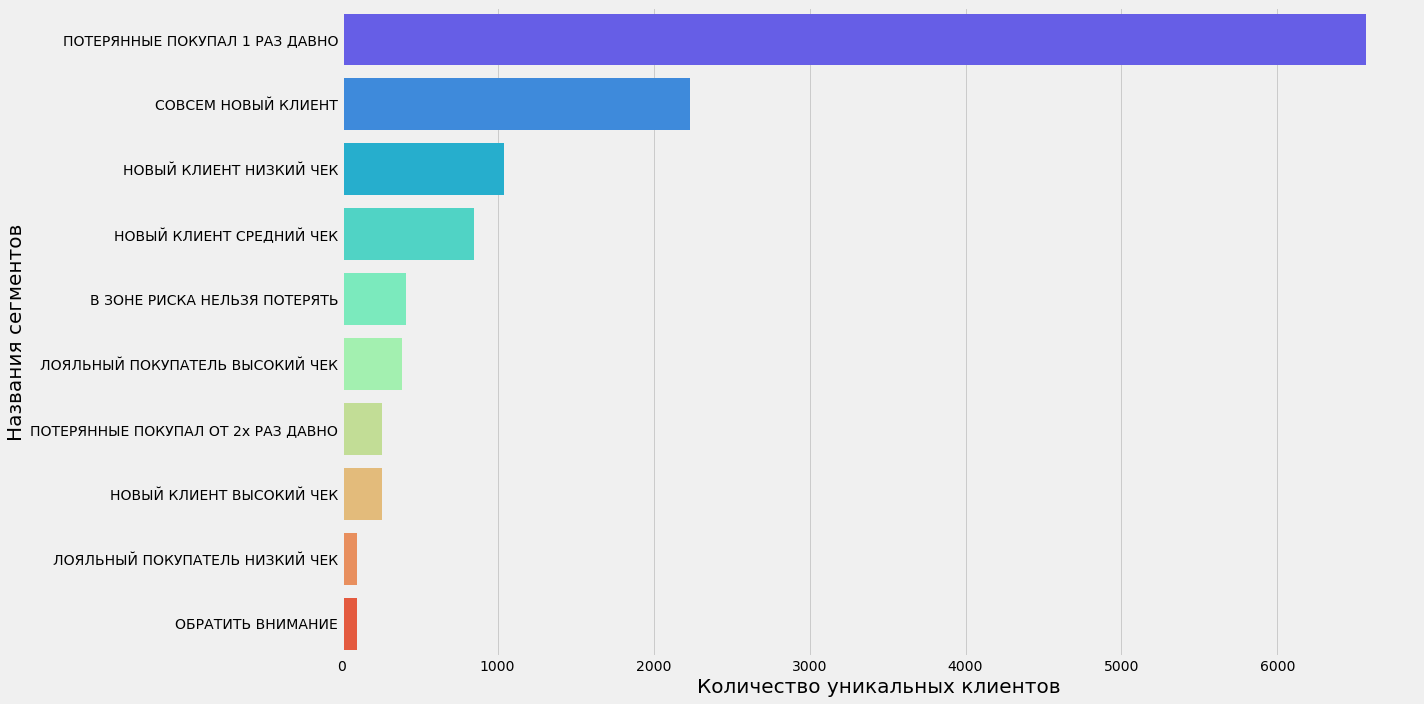

In [113]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x='telephone', y='segment_chart', data=segment_names, palette='rainbow')
    plt.xlabel('Количество уникальных клиентов', fontsize = 20)
    plt.ylabel('Названия сегментов', fontsize = 20)
    labels = ax.get_xticklabels()
    plt.tight_layout()
    plt.savefig('koleso_client_segments.png', dpi=199)

# Постобработка

### Количество раз, которое клиент совершал покупки

In [114]:
df['num_of_purchases'] = df['telephone'].apply(lambda x: df[df['telephone'] == x]['total'].count())

In [115]:
df['num_of_purchases'].value_counts()

1     10946
2      2128
3       396
4       160
7        28
6        24
5        20
13       13
9         9
Name: num_of_purchases, dtype: int64

### Средний чек клиента

In [116]:
df['AOV'] = df['telephone'].apply(lambda x: df[df['telephone'] == x]['total'].mean())

In [117]:
df.columns

Index(['customer_id', 'firstname', 'store_url', 'lastname', 'email',
       'telephone', 'total', 'date_added', 'shipping_city', 'telephone_len',
       'date_x', 'days_since_prev_order', 'recency', 'frequency', 'monetary',
       'R', 'F', 'M', 'RFM_Score', 'segment', 'segment_chart',
       'num_of_purchases', 'AOV'],
      dtype='object')

### Год покупки

In [118]:
df['year'] = df['date_x'].apply(lambda x: x.year)

In [119]:
df['year']

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
13719    2022
13720    2022
13721    2022
13722    2022
13723    2022
Name: year, Length: 13724, dtype: int64

### Год, когда клиент купил первый раз

In [120]:
df['first_year'] = df['telephone'].apply(lambda x: df[df['telephone'] == x]['year'].min())

### Год, когда купил последний раз

In [121]:
df['last_year'] = df['telephone'].apply(lambda x: df[df['telephone'] == x]['year'].max())

### Интервал

In [122]:
df['year_delta'] = df['last_year'] - df['first_year']

In [123]:
df['year_delta'].value_counts()

0    13352
1      283
2       63
3       24
4        2
Name: year_delta, dtype: int64

In [124]:
def how_much_years_made_purchases(delta):
    if delta == 0:
        return 'Покупал в течение 1 года'
    elif delta == 1:
        return 'Покупал в течение 2х лет'
    elif delta == 2:
        return 'Покупал в течение 3х лет'
    elif delta == 3:
        return 'Покупал в течение 4х лет'
    else:
        return 'Покупал в течение 5ти лет'
    

In [125]:
df['year_delta'] = df['year_delta'].apply(how_much_years_made_purchases)

In [126]:
df['year_delta'].value_counts()

Покупал в течение 1 года     13352
Покупал в течение 2х лет       283
Покупал в течение 3х лет        63
Покупал в течение 4х лет        24
Покупал в течение 5ти лет        2
Name: year_delta, dtype: int64

In [127]:
df.columns

Index(['customer_id', 'firstname', 'store_url', 'lastname', 'email',
       'telephone', 'total', 'date_added', 'shipping_city', 'telephone_len',
       'date_x', 'days_since_prev_order', 'recency', 'frequency', 'monetary',
       'R', 'F', 'M', 'RFM_Score', 'segment', 'segment_chart',
       'num_of_purchases', 'AOV', 'year', 'first_year', 'last_year',
       'year_delta'],
      dtype='object')

In [128]:
df.drop(columns = ['customer_id', 'store_url',
                  'telephone_len','date_added',
                   'recency', 'frequency', 'monetary',
                   'R', 'F', 'M',
                   'segment_chart',
                   'year', 'first_year', 'last_year'
                  ], inplace=True)

In [129]:
df.columns

Index(['firstname', 'lastname', 'email', 'telephone', 'total', 'shipping_city',
       'date_x', 'days_since_prev_order', 'RFM_Score', 'segment',
       'num_of_purchases', 'AOV', 'year_delta'],
      dtype='object')

In [130]:
df.columns = ['Имя', 'Фамилия', 'email', 'Телефон', 
              'Сумма покупки', 'Город', 'Дата покупки','Давность покупки (дней)', 
              'RFM баллы', 'Название сегмента', 'Общее количество покупок', 'Средний чек',
             'Интервал покупок']

In [131]:
df.head()

,Имя,Фамилия,email,Телефон,Сумма покупки,Город,Дата покупки,Давность покупки (дней),RFM баллы,Название сегмента,Общее количество покупок,Средний чек,Интервал покупок
0,Наталия,NaN,nrshop@ya.ru,+79213147897,38908,Санкт-Петербург,2017-10-20 13:54:44,1790,111,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,38908.0,Покупал в течение 1 года
1,Виталий,NaN,vstolyarov@vertex.spb.ru,+79219192624,60288,Санкт-Петербург,2017-10-23 17:17:31,1787,115,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,60288.0,Покупал в течение 1 года
2,Дмитрий,NaN,szht@bk.ru,+79627298300,29384,Санкт-Петербург,2017-10-26 14:44:04,1784,114,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,29384.0,Покупал в течение 1 года
3,валентин,NaN,-,+79618000831,9692,NaN,2017-10-27 20:29:58,1783,112,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,9692.0,Покупал в течение 1 года
4,НИКОЛАЙ,NaN,-,+79210937176,2635,NaN,2017-10-28 16:48:20,1782,111,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,2635.0,Покупал в течение 1 года


In [132]:
df.isna().sum()

Имя                             0
Фамилия                     13071
email                           0
Телефон                         0
Сумма покупки                   0
Город                        3853
Дата покупки                    0
Давность покупки (дней)         0
RFM баллы                       0
Название сегмента               0
Общее количество покупок        0
Средний чек                     0
Интервал покупок                0
dtype: int64

In [133]:
df.fillna('-', inplace=True)

In [134]:
df.isna().sum()

Имя                         0
Фамилия                     0
email                       0
Телефон                     0
Сумма покупки               0
Город                       0
Дата покупки                0
Давность покупки (дней)     0
RFM баллы                   0
Название сегмента           0
Общее количество покупок    0
Средний чек                 0
Интервал покупок            0
dtype: int64

In [135]:
df

,Имя,Фамилия,email,Телефон,Сумма покупки,Город,Дата покупки,Давность покупки (дней),RFM баллы,Название сегмента,Общее количество покупок,Средний чек,Интервал покупок
0,Наталия,-,nrshop@ya.ru,+79213147897,38908,Санкт-Петербург,2017-10-20 13:54:44,1790,111,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,38908.0,Покупал в течение 1 года
1,Виталий,-,vstolyarov@vertex.spb.ru,+79219192624,60288,Санкт-Петербург,2017-10-23 17:17:31,1787,115,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,60288.0,Покупал в течение 1 года
2,Дмитрий,-,szht@bk.ru,+79627298300,29384,Санкт-Петербург,2017-10-26 14:44:04,1784,114,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,29384.0,Покупал в течение 1 года
3,валентин,-,-,+79618000831,9692,-,2017-10-27 20:29:58,1783,112,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,9692.0,Покупал в течение 1 года
4,НИКОЛАЙ,-,-,+79210937176,2635,-,2017-10-28 16:48:20,1782,111,ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дне...,1,2635.0,Покупал в течение 1 года
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,Алл,-,2017013@e`.ru,+79638501389,24420,Екатеринбург,2022-09-14 08:02:53,1,513,СОВСЕМ НОВЫЙ КЛИЕНТ - покупал первый раз совсе...,1,24420.0,Покупал в течение 1 года
13720,Алексей,-,Iehahob1976@mail.ru,+79522156267,38956,Санкт-Петербург,2022-09-14 10:19:48,1,514,СОВСЕМ НОВЫЙ КЛИЕНТ - покупал первый раз совсе...,1,38956.0,Покупал в течение 1 года
13721,Михаил,-,-,+79911361521,9542,-,2022-09-14 10:59:41,1,512,СОВСЕМ НОВЫЙ КЛИЕНТ - покупал первый раз совсе...,1,9542.0,Покупал в течение 1 года
13722,Егор,-,-,+79169805773,24176,-,2022-09-14 11:34:16,1,513,СОВСЕМ НОВЫЙ КЛИЕНТ - покупал первый раз совсе...,1,24176.0,Покупал в течение 1 года


In [136]:
df.sort_values(by='Телефон', inplace=True)

# Экспорт

In [137]:
koleso_rfm = pd.ExcelWriter('RFM-сегменты клиентов The-Koleso.xlsx', engine='xlsxwriter')
df.to_excel(koleso_rfm, sheet_name='Все данные', index=False)

df[df['Название сегмента']=='ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО - более 639 дней назад'].to_excel(koleso_rfm, sheet_name='ПОТЕРЯННЫЕ - 1 РАЗ ДАВНО', index=False)
df[df['Название сегмента']=='ПОТЕРЯННЫЕ ПОКУПАЛ ОТ 2х РАЗ ДАВНО - более 639 дней назад'].to_excel(koleso_rfm, sheet_name='ПОТЕРЯННЫЕ - ОТ 2х РАЗ ДАВНО', index=False)

df[df['Название сегмента']=='В ЗОНЕ РИСКА НЕЛЬЗЯ ПОТЕРЯТЬ - последний раз покупали давно - более 483 дней назад, но довольно часто - от 2х раз и на средние-крупные суммы'].to_excel(koleso_rfm, sheet_name='В ЗОНЕ РИСКА НЕЛЬЗЯ ПОТЕРЯТЬ', index=False)
df[df['Название сегмента']=='ОБРАТИТЬ ВНИМАНИЕ - последний раз покупали давно - более 483 дней назад, но раньше покупал часто - от 2х раз'].to_excel(koleso_rfm, sheet_name='ОБРАТИТЬ ВНИМАНИЕ', index=False)

df[df['Название сегмента']=='ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ ВЫСОКИЙ ЧЕК - покупает часто - более от 2х раз, покупал недавно - до 483 дней назад'].to_excel(koleso_rfm, sheet_name='ЛОЯЛ.ПОКУПАТЕЛЬ ВЧ', index=False)
df[df['Название сегмента']=='ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ НИЗКИЙ ЧЕК - покупает часто - более от 2х раз, покупал недавно - до 483 дней назад'].to_excel(koleso_rfm, sheet_name='ЛОЯЛ.ПОКУПАТЕЛЬ НЧ', index=False)

df[df['Название сегмента']=='НОВЫЙ КЛИЕНТ НИЗКИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад'].to_excel(koleso_rfm, sheet_name='НОВ.КЛИЕНТ НЧ', index=False)
df[df['Название сегмента']=='НОВЫЙ КЛИЕНТ СРЕДНИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад'].to_excel(koleso_rfm, sheet_name='НОВ.КЛИЕНТ ВЧ', index=False)
df[df['Название сегмента']=='НОВЫЙ КЛИЕНТ ВЫСОКИЙ ЧЕК - покупал первый раз недавно - до 483 дней назад'].to_excel(koleso_rfm, sheet_name='НОВ.КЛИЕНТ СЧ', index=False)

df[df['Название сегмента']=='СОВСЕМ НОВЫЙ КЛИЕНТ - покупал первый раз совсем недавно - до 190 дней назад'].to_excel(koleso_rfm, sheet_name='СОВСЕМ НОВЫЙ КЛИЕНТ', index=False)


koleso_rfm.save()


# Вывод

Анализ состоял из следующих этапов:
<br>
1) Предобработка, в ходе которой были приведены к одному виду номера телефонов (начинаются с +7, длина 12 символов). Номер телефона является уникальным идентификатором пользователя. Строки с номера, которые не прошли стандартизацию были удалены. Также были удалены ненастоящие заказы, дубликаты. Изначальный объем данных был 16477 записей. В ходе предобработки удалено 2753 строки – 16,7%.
<br>
<br>
2) Создание RFM-модели. Временной период рассмотрения данных составил 1790 дней, начало – 20 октября 2018, конец – 14 сентября 2022. Для каждого уникального пользователя (уникальность определялась по номеру телефона) рассчитана последняя дата покупки, частота покупок и сумма, потраченная за все время. Для каждого параметра рассчитаны квантили длиной 20%-40%-60%-80%.

In [138]:
quintiles

{'recency': {0.2: 190.0, 0.4: 482.0, 0.6: 638.0, 0.8: 830.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'monetary': {0.2: 8323.6,
  0.4: 15727.200000000012,
  0.6: 24560.0,
  0.8: 41132.0}}

Это означает:
<br>
<br>
Recency:<br>
- 20% клиентов в первом квантиле имеют верхнюю границу давности 189 дней, в этом отрезке клиенты, которые покупали совсем недавно по сравнению с остальными - получают балл R5 ,<br>
- 20% клиентов во втором отрезке - давность от 190 до 474 дней - R4,<br>
- 20% клиентов в третьем отрезке - от 475 до 639 дней - R3,<br>
- 20% клиентов в четвертом отрезке - от 640 до 831 дней - R2,<br>
- 20% клиентов в пятом отрезке - от 832 дней и больше - R1.<br>
<br>
<br>
Frequency:<br>
- 60% клиентов с первого по третий отрезки - покупали 1 раз - F1,<br>
- 20% в четвертом отрезке - 2 раза - F4,<br>
- 20% в пятом отрезке - больше 2 раз - F5.<br>
<br>
<br>
Monetary:<br> 
- 20% клиентов в первом отрезке - верхняя граница трат 9780 руб. - M1,<br> 
- 20% клиентов во втором отрезке - 18294 - M2,<br> 
- 20% клиентов в третьем отрезке - 29503 - M3,<br> 
- 20% клиентов в четвертом отрезке - 54400 - M4,<br> 
- 20% клиентов в пятом отрезке - более 54400 - M5.<br> 

Таким образом за каждом клиентом закреплены баллы RFM, например 415 – это означает, что клиент купил первый раз недавно на крупную сумму, 355 – клиент, который покупал больше 2х раз, на большие суммы, но довольно давно, этот клиент может быть потерян.
По распределению можно поверхностно сделать сказать, что самые недавние клиенты (R) находятся в пределах 474 дней, средняя давность 475-639 дней, давние от 831 дня.
Частота покупок (F) у 60% клиентов - 1 раз, у 20% 2 раза, еще у 20% больше 2 раз.
Потраченная сумма (M) до 9780 руб. имеет низкий ранг, от 18294 до 29503 - средний ранг, больше 54400 - высокий ранг.

### Описание сегментов

ПОТЕРЯННЫЕ ПОКУПАЛ 1 РАЗ ДАВНО – самый крупный сегмент, 1 раз покупали более 832 двух дней назад. С одной стороны можно сказать, что эти клиенты потеряны навсегда, с другой – возможно какая-то часть этих покупателей до сих пор использует ранее купленные шины.<br> 
<br> 
ПОТЕРЯННЫЕ ПОКУПАЛ ОТ 2х РАЗ ДАВНО – похожая группа, но покупали от 2х раз более 832 двух дней назад.
<br> 
<br> 
СОВСЕМ НОВЫЙ КЛИЕНТ – второй по объему сегмент, в котором клиенты совершали покупки совсем недавно – до 190 дней назад.
<br> 
<br> 
НОВЫЙ КЛИЕНТ НИЗКИЙ ЧЕК,  НОВЫЙ КЛИЕНТ СРЕДНИЙ ЧЕК,  НОВЫЙ КЛИЕНТ ВЫСОКИЙ ЧЕК – клиенты совершали покупки относительно недавно – от 190 до 474 дней назад.
<br> 
<br> 
В ЗОНЕ РИСКА НЕЛЬЗЯ ПОТЕРЯТЬ – покупали несколько раз и на крупные суммы, но последний раз покупали довольно давно - от 475 до 639 дней назад. Некоторые клиенты совершали несколько покупок подряд (несколько комплектов шин или дисков), некоторые возвращались в течение нескольких лет – эта информация указана в поле «Интервал покупок».
<br> 
<br> 
ОБРАТИТЬ ВНИМАНИЕ – похожая группа, покупали несколько раз на разные суммы, последний раз покупали довольно давно - от 475 до 639 дней назад.
<br> 
<br> 
ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ НИЗКИЙ ЧЕК, ЛОЯЛЬНЫЙ ПОКУПАТЕЛЬ ВЫСОКИЙ ЧЕК – покупали недавно, покупали от 2х раз (часто). Может показаться, что это клиенты, которые действительно лояльны и постоянно совершают покупки в магазине, но в эту группу попало много людей, которые совершили много покупок в течение короткого промежутка времени.